<a href="https://colab.research.google.com/github/szandian/FA2024-EE-634-AV-Intro-to-Neural-Networks/blob/main/Hw1_intro_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0: Loss = 0.6931
Epoch 1000: Loss = 0.0449
Epoch 2000: Loss = 0.0165
Epoch 3000: Loss = 0.0098
Epoch 4000: Loss = 0.0069
Epoch 5000: Loss = 0.0053
Epoch 6000: Loss = 0.0043
Epoch 7000: Loss = 0.0036
Epoch 8000: Loss = 0.0031
Epoch 9000: Loss = 0.0027


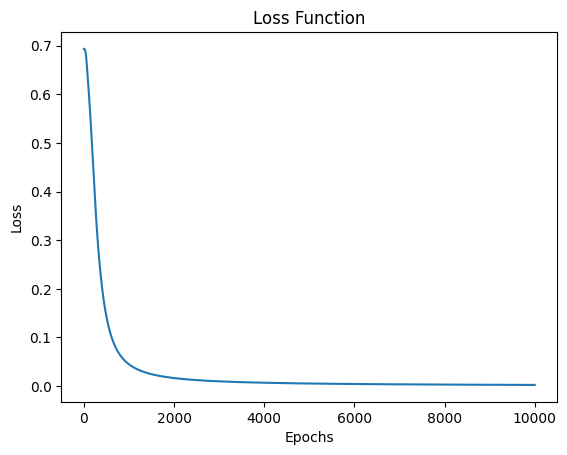

Confusion Matrix:
 [[13  0]
 [ 0 12]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Activation function (Sigmoid)
def sigmoid(z):
    return 1/(1 + np.exp(-z))

# Derivative of the sigmoid function
def sigmoid_derivative(a):
    return a * (1 - a)

# Neural network function
def nn_binary_classification(X, y, hidden_neurons, alpha, epochs):
    np.random.seed(1)
    input_neurons = X.shape[0]
    output_neurons = 1  # Binary classification (1 output)

    # Initialize weights
    W1 = np.random.randn(hidden_neurons, input_neurons) * 0.01
    W2 = np.random.randn(output_neurons, hidden_neurons) * 0.01
    b1 = np.zeros((hidden_neurons, 1))
    b2 = np.zeros((output_neurons, 1))

    m = X.shape[1]  # Number of examples
    losses = []

    # Training loop
    for epoch in range(epochs):
        # Forward propagation
        Z1 = np.dot(W1, X) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = sigmoid(Z2)

        # Compute loss
        loss = -np.sum(y*np.log(A2) + (1-y)*np.log(1-A2)) / m
        losses.append(loss)

        # Backward propagation
        dZ2 = A2 - y
        dW2 = np.dot(dZ2, A1.T) / m
        db2 = np.sum(dZ2, axis=1, keepdims=True) / m

        dA1 = np.dot(W2.T, dZ2)
        dZ1 = dA1 * sigmoid_derivative(A1)
        dW1 = np.dot(dZ1, X.T) / m
        db1 = np.sum(dZ1, axis=1, keepdims=True) / m

        # Update weights and biases
        W1 -= alpha * dW1
        b1 -= alpha * db1
        W2 -= alpha * dW2
        b2 -= alpha * db2

        # Print the loss every 1000 epochs
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

    # Plot the loss function over epochs
    plt.plot(losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Function')
    plt.show()

    return W1, b1, W2, b2

# Predict function
def predict(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    return (A2 > 0.5).astype(int)

# Generate binary classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2)
X = X.T  # Transpose to fit our network input dimensions
y = y.reshape(1, -1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.T, y.T, test_size=0.25, random_state=47)
X_train = X_train.T  # Transpose back to match dimensions
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

# Hyperparameters
hidden_neurons = 2
alpha = 0.1
epochs = 10000

# Train the model
W1, b1, W2, b2 = nn_binary_classification(X_train, y_train, hidden_neurons, alpha, epochs)

# Predict on the test data
y_pred = predict(X_test, W1, b1, W2, b2)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test.flatten(), y_pred.flatten()))
print("\nClassification Report:\n", classification_report(y_test.flatten(), y_pred.flatten()))


Epoch 0: Loss = 1.0982
Epoch 1000: Loss = 0.0131
Epoch 2000: Loss = 0.0063
Epoch 3000: Loss = 0.0041
Epoch 4000: Loss = 0.0030
Epoch 5000: Loss = 0.0024
Epoch 6000: Loss = 0.0020
Epoch 7000: Loss = 0.0017
Epoch 8000: Loss = 0.0015
Epoch 9000: Loss = 0.0013


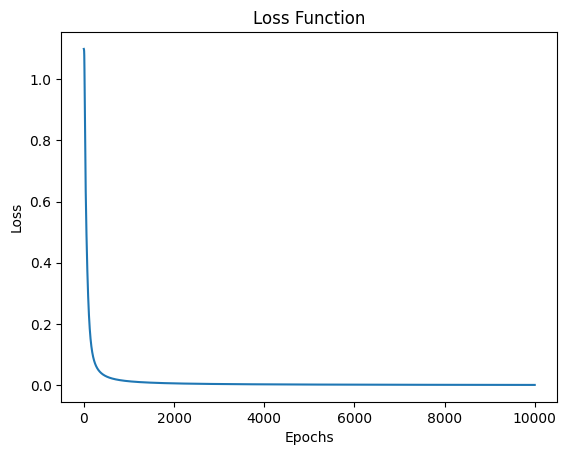

Confusion Matrix:
 [[25  0  0]
 [ 0 24  0]
 [ 0  0 26]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        26

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Activation function (Softmax for multi-class classification)
def softmax(z):
    exp_scores = np.exp(z - np.max(z, axis=0, keepdims=True))  # Prevent overflow
    return exp_scores / np.sum(exp_scores, axis=0, keepdims=True)

# Derivative of the softmax (Cross-entropy and softmax together are handled in one step)
def softmax_loss(y, a):
    m = y.shape[1]
    log_likelihood = -np.log(a[y.argmax(axis=0), np.arange(m)])
    loss = np.sum(log_likelihood) / m
    return loss

# Neural network function for multi-class classification
def nn_multiclass_classification(X, y, hidden_neurons, alpha, epochs):
    np.random.seed(1)
    input_neurons = X.shape[0]
    output_neurons = y.shape[0]  # Number of classes

    # Initialize weights
    W1 = np.random.randn(hidden_neurons, input_neurons) * 0.01
    W2 = np.random.randn(output_neurons, hidden_neurons) * 0.01
    b1 = np.zeros((hidden_neurons, 1))
    b2 = np.zeros((output_neurons, 1))

    m = X.shape[1]  # Number of examples
    losses = []

    # Training loop
    for epoch in range(epochs):
        # Forward propagation
        Z1 = np.dot(W1, X) + b1
        A1 = np.tanh(Z1)  # Using tanh activation for hidden layer
        Z2 = np.dot(W2, A1) + b2
        A2 = softmax(Z2)  # Softmax activation for output layer

        # Compute loss (categorical cross-entropy)
        loss = softmax_loss(y, A2)
        losses.append(loss)

        # Backward propagation
        dZ2 = A2 - y
        dW2 = np.dot(dZ2, A1.T) / m
        db2 = np.sum(dZ2, axis=1, keepdims=True) / m

        dA1 = np.dot(W2.T, dZ2)
        dZ1 = dA1 * (1 - np.power(A1, 2))  # Derivative of tanh
        dW1 = np.dot(dZ1, X.T) / m
        db1 = np.sum(dZ1, axis=1, keepdims=True) / m

        # Update weights and biases
        W1 -= alpha * dW1
        b1 -= alpha * db1
        W2 -= alpha * dW2
        b2 -= alpha * db2

        # Print the loss every 1000 epochs
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

    # Plot the loss function over epochs
    plt.plot(losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss Function')
    plt.show()

    return W1, b1, W2, b2

# Predict function
def predict_multiclass(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return np.argmax(A2, axis=0)

# Generate multi-class classification dataset
X, y = make_blobs(n_samples=300, centers=3, n_features=2)
X = X.T  # Transpose to fit our network input dimensions
y = np.eye(3)[y].T  # One-hot encode the labels for 3 classes

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.T, y.T, test_size=0.25, random_state=47)
X_train = X_train.T  # Transpose back to match dimensions
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

# Hyperparameters
hidden_neurons = 2
alpha = 0.1
epochs = 10000

# Train the model
W1, b1, W2, b2 = nn_multiclass_classification(X_train, y_train, hidden_neurons, alpha, epochs)

# Predict on the test data
y_pred = predict_multiclass(X_test, W1, b1, W2, b2)

# Convert one-hot labels back to class numbers for evaluation
y_test_class = np.argmax(y_test, axis=0)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test_class, y_pred))
print("\nClassification Report:\n", classification_report(y_test_class, y_pred))


**Part I: Binary Classification (with comparison of alpha and hidden layer sizes)**

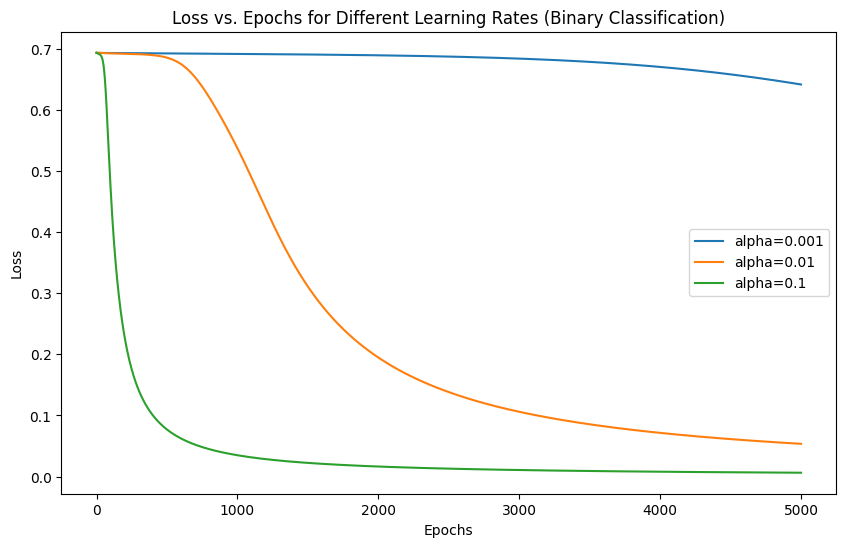

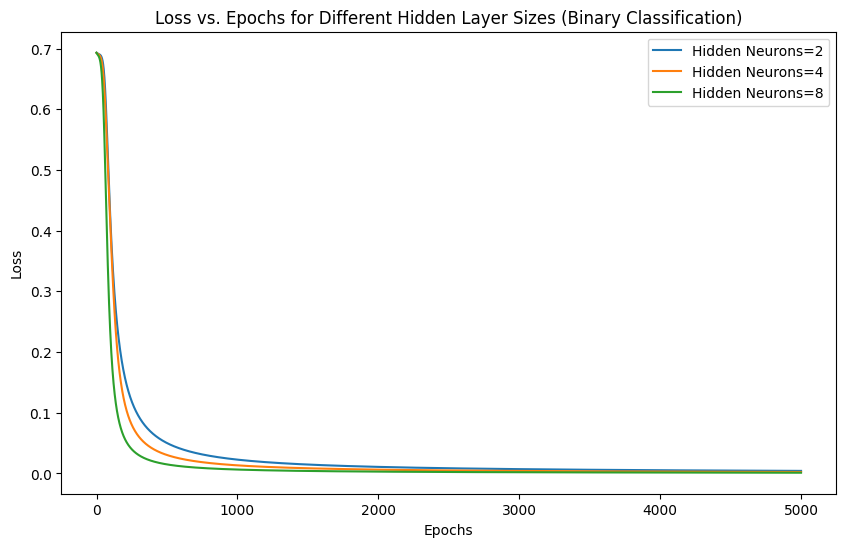

In [ ]:

# Generate binary classification dataset
X, y = make_blobs(n_samples=100, centers=2, n_features=2)
X = X.T  # Transpose to fit network input dimensions
y = y.reshape(1, -1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.T, y.T, test_size=0.25, random_state=47)
X_train, X_test = X_train.T, X_test.T
y_train, y_test = y_train.T, y_test.T

# Hyperparameters to compare
alphas = [0.001, 0.01, 0.1]
hidden_layers = [2, 4, 8]
epochs = 5000

# Plot different learning rates (alpha)
plt.figure(figsize=(10, 6))
for alpha in alphas:
    losses = nn_binary_classification(X_train, y_train, hidden_neurons=2, alpha=alpha, epochs=epochs)
    plt.plot(losses, label=f'alpha={alpha}')
plt.title('Loss vs. Epochs for Different Learning Rates (Binary Classification)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot different hidden layer sizes
plt.figure(figsize=(10, 6))
for hidden_neurons in hidden_layers:
    losses = nn_binary_classification(X_train, y_train, hidden_neurons=hidden_neurons, alpha=0.1, epochs=epochs)
    plt.plot(losses, label=f'Hidden Neurons={hidden_neurons}')
plt.title('Loss vs. Epochs for Different Hidden Layer Sizes (Binary Classification)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


**Part II: Multi-Class Classification (with comparison of alpha and hidden layer sizes)**

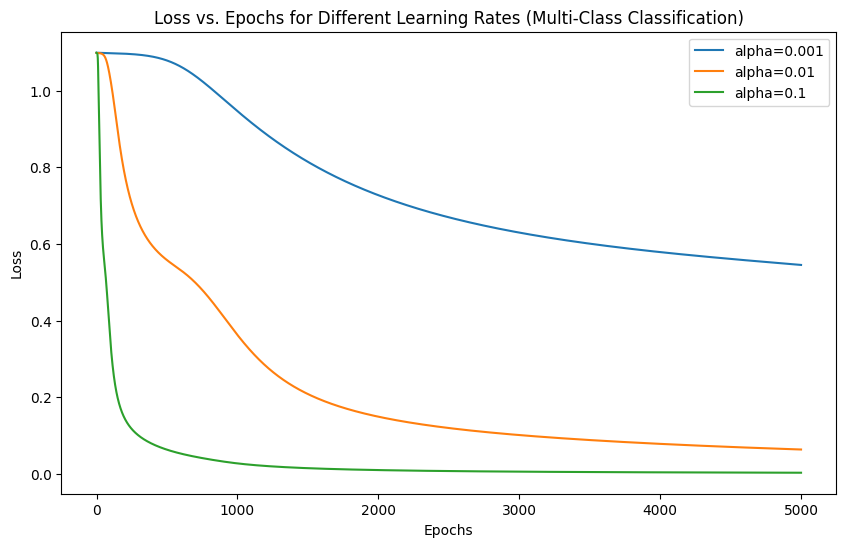

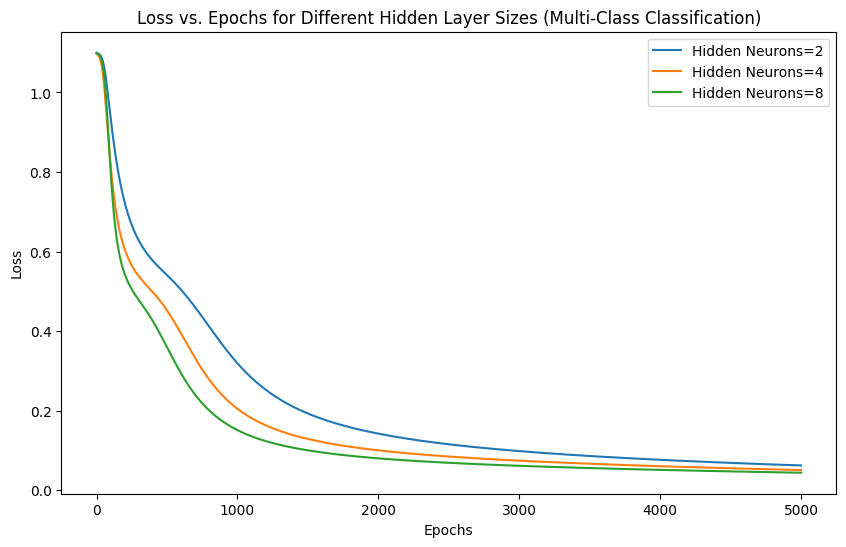

In [ ]:

# Generate multi-class classification dataset
X, y = make_blobs(n_samples=300, centers=3, n_features=2)
X = X.T
y = np.eye(3)[y].T  # One-hot encode for 3 classes

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.T, y.T, test_size=0.25, random_state=47)
X_train, X_test = X_train.T, X_test.T
y_train, y_test = y_train.T, y_test.T

# Hyperparameters to compare
alphas = [0.001, 0.01, 0.1]
hidden_layers = [2, 4, 8]
epochs = 5000

# Plot different learning rates (alpha)
plt.figure(figsize=(10, 6))
for alpha in alphas:
    losses = nn_multiclass_classification(X_train, y_train, hidden_neurons=2, alpha=alpha, epochs=epochs)
    plt.plot(losses, label=f'alpha={alpha}')
plt.title('Loss vs. Epochs for Different Learning Rates (Multi-Class Classification)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot different hidden layer sizes
plt.figure(figsize=(10, 6))
for hidden_neurons in hidden_layers:
    losses = nn_multiclass_classification(X_train, y_train, hidden_neurons=hidden_neurons, alpha=0.01, epochs=epochs)
    plt.plot(losses, label=f'Hidden Neurons={hidden_neurons}')
plt.title('Loss vs. Epochs for Different Hidden Layer Sizes (Multi-Class Classification)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
